# Churn - Exploratory Data Analysys

In [1]:
# required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

## Load and first glance of data

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# checking numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


+ There are no null values.
+ Senior citizen is categorical, being 0 a no and 1 yes, so the Q1, Q2 and Q3 distribution is not proper.
+ Mean tenure is of 29 months, and less that 75% of costumers stays more than 55 months.
+ The mean of charges are $64.76, whereas 25% of customers pay more than $89.85.

In [9]:
# transforming columns to lowercase for easier exploration
df.columns = df.rename(columns=lambda x: x.lower()).columns

Text(0, 0.5, 'Target Variable')

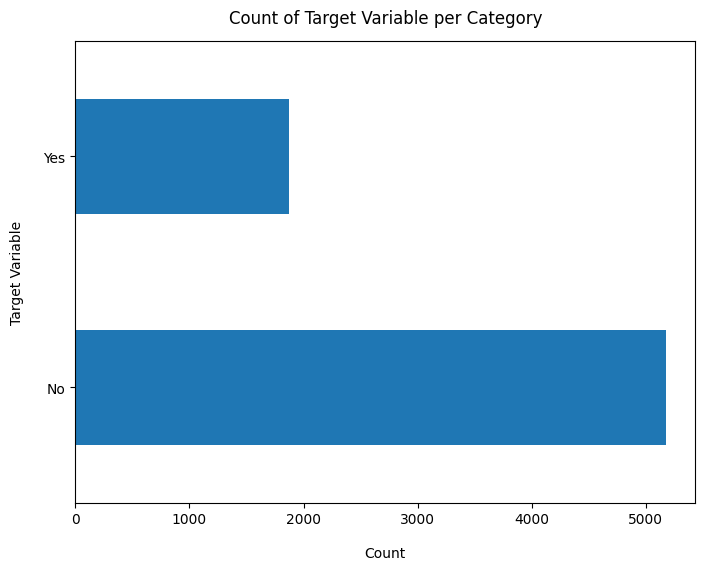

In [21]:
# exploring churn data

df.churn.value_counts().plot(kind='barh', figsize=(8, 6))
plt.title("Count of Target Variable per Category", y = 1.02)
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)

In [16]:
# percentage of Yes and No
100*df.churn.value_counts()/len(df.churn)

churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

+ 26% of customers leave the company.
+ A 73:26 ratio in data is highly imbalance, so we have to look at the relationship of other features to take further insights.

In [19]:
# exploring other features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


No data seems to be null or missing, but we cannot discard incorrect values.